<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Target</a></span></li><li><span><a href="#Join-and-cleanup-data" data-toc-modified-id="Join-and-cleanup-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Join and cleanup data</a></span></li></ul></li><li><span><a href="#Exploratory-analysis-and-feature-selection" data-toc-modified-id="Exploratory-analysis-and-feature-selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory analysis and feature selection</a></span><ul class="toc-item"><li><span><a href="#Scatter-matrices" data-toc-modified-id="Scatter-matrices-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Scatter matrices</a></span><ul class="toc-item"><li><span><a href="#Hydro-variables" data-toc-modified-id="Hydro-variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Hydro variables</a></span></li><li><span><a href="#Hydro-modification-variables" data-toc-modified-id="Hydro-modification-variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Hydro modification variables</a></span></li><li><span><a href="#Morphological-variables" data-toc-modified-id="Morphological-variables-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Morphological variables</a></span></li><li><span><a href="#Climate-variables" data-toc-modified-id="Climate-variables-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Climate variables</a></span></li><li><span><a href="#Corellations" data-toc-modified-id="Corellations-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Corellations</a></span></li></ul></li></ul></li><li><span><a href="#Summary-of-findings-and-data-export" data-toc-modified-id="Summary-of-findings-and-data-export-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary of findings and data export</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
from sqlalchemy import create_engine
%matplotlib inline

# Purpose
This notebook investigates the relationships between basin characteristics and NWM streamflow forecast error

# Data preparation

In [2]:
# Establish database connection
with pathlib.Path('/Users/jmills/dbcon').open() as f:
    dbcon = f.readlines()
dbcon = create_engine(dbcon[0])

## Features

In [3]:
# Read in static basin characteristics dataset
basin_chars = pd.read_csv('../data/basin_chars.csv',dtype={'STAID':str})
basin_chars.rename(columns={'STAID':'site_no'},inplace=True)
basin_chars.set_index('site_no',inplace=True)
basin_chars.head()

,DRAIN_SQKM,CLASS,HYDRO_DISTURB_INDX,BAS_COMPACTNESS,WD_BASIN,WD_SITE,PET,SNOW_PCT_PRECIP,PRECIP_SEAS_IND,STREAMS_KM_SQ_KM,MAINSTEM_SINUOUSITY,TOPWET,RUNAVE7100,PCT_1ST_ORDER,PCT_2ND_ORDER,PCT_3RD_ORDER,PCT_4TH_ORDER,PCT_5TH_ORDER,PCT_6TH_ORDER_OR_MORE,PCT_NO_ORDER,NDAMS_2009,RAW_DIS_NEAREST_DAM,CANALS_PCT,RAW_DIS_NEAREST_CANAL,PCT_IRRIG_AG,HIRES_LENTIC_DENS,HIRES_LENTIC_MEANSIZ,CLAYAVE,SILTAVE,SANDAVE,SLOPE_PCT
site_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01011000,3186.8,Non-ref,8,1.29,133.4,133,507.5,37.5,0.110,0.57,1.53,11.50,484.4,62.27,19.78,9.84,4.10,2.89,0.0,1.12,2,21.9,0.0,-999.0,0.00,0.231,177.2,18.36,59.77,21.87,5.9
01013500,2252.7,Ref,5,0.87,136.4,132,504.7,36.9,0.102,0.67,2.11,12.11,604.1,60.87,19.82,8.37,7.95,2.58,0.0,0.41,3,10.6,0.0,-999.0,0.08,0.348,181.4,14.76,62.82,22.43,6.9
01015800,2313.8,Non-ref,4,0.91,133.8,132,506.2,37.1,0.078,0.58,1.74,12.19,585.0,57.41,19.11,12.34,6.18,3.42,0.0,1.54,1,42.7,0.0,-999.0,0.00,0.532,41.2,15.41,61.56,23.04,4.6
01016500,847.8,Non-ref,4,1.11,136.1,132,501.8,37.5,0.089,0.71,1.69,11.80,583.6,59.31,19.06,11.43,9.87,0.00,0.0,0.34,1,43.5,0.0,-999.0,0.00,0.264,38.8,16.00,60.75,23.25,6.8
01017000,4278.9,Non-ref,5,0.96,134.4,136,506.4,37.2,0.082,0.63,1.61,12.12,584.5,58.59,18.85,11.89,6.10,3.53,0.0,1.05,4,1.6,0.0,-999.0,0.03,0.425,45.3,16.40,60.71,22.89,4.8


In [4]:
basin_chars_desc = pd.read_csv('../data/basin_char_desc.csv')
basin_chars_desc

,VARIABLE_TYPE,VARIABLE_NAME,DESCRIPTION
0,BasinID,DRAIN_SQKM,"Watershed drainage area, sq km, as delineated ..."
1,Bas_Classif,CLASS,Reference/non-reference class: REF = referenc...
2,Bas_Classif,HYDRO_DISTURB_INDX,"Hydrologic ""disturbance index"" score, based on..."
3,Bas_Morph,BAS_COMPACTNESS,"Watershed compactness ratio, = area/perimeter^..."
4,Bound_QA,DRAIN_SQKM,"Watershed drainage area, sq km, as delineated ..."
5,Climate,WD_BASIN,Watershed average of annual number of days (da...
6,Climate,WD_SITE,Site average of annual number of days (days) o...
7,Climate,PET,Mean-annual potential evapotranspiration (PET)...
8,Climate,SNOW_PCT_PRECIP,"Snow percent of total precipitation estimate, ..."
9,Climate,PRECIP_SEAS_IND,"Precipitation seasonality index (Markham, 1970..."


## Target

In [5]:
# Available statistics
pd.read_sql('SELECT DISTINCT(STATISTIC) FROM stats_gof_leadtime_short_range_channel_rt_1',dbcon)

,statistic
0,mean_obs
1,rsr
2,agreementindex
3,lognashsutcliffe
4,correlationcoefficient
5,rmse
6,volume_error
7,mae
8,nashsutcliffe
9,rsquared


In [6]:
# Read stats
stats = pd.read_sql("SELECT r.site_no,s.statistic,s.value as value,s.leadtime"
                    " FROM stats_gof_leadtime_short_range_channel_rt_1 s"
                    " LEFT JOIN route_link r on r.feature_id=s.feature_id"
                    " WHERE statistic IN ('rsr','mean_obs','std_obs')",dbcon)
stats.set_index('site_no',inplace=True)
stats = stats.pivot_table(index=['site_no','leadtime'],columns='statistic',values='value')
stats.dropna(inplace=True)
stats = stats[stats['mean_obs'] > 0]
stats = stats[stats['std_obs'] > 0]
stats['cv_obs'] = stats['mean_obs']/stats['std_obs']
stats.describe()

statistic,mean_obs,rsr,std_obs,cv_obs
count,126625.000000,126625.000000,126625.000000,126625.000000
mean,2041.787208,6.107388,1151.290746,2.351552
std,18625.850789,94.552209,5885.106739,5.367335
min,0.010000,0.010000,0.040000,0.000916
25%,27.350000,0.630000,23.840000,0.567232
50%,129.380000,1.170000,127.630000,1.047242
75%,584.030000,2.660000,567.050000,2.075688
max,743404.000000,7129.940000,208125.000000,207.033195


In [7]:
stats.reset_index('leadtime',inplace=True)
stats.head()

statistic,leadtime,mean_obs,rsr,std_obs,cv_obs
site_no,,,,,
01010000,1.0,1130.36,0.26,1564.96,0.722293
01010000,2.0,1132.47,0.42,1566.96,0.722718
01010000,3.0,1134.61,0.57,1568.98,0.723151
01010000,4.0,1136.75,0.71,1571.01,0.723579
01010000,5.0,1137.98,0.83,1572.69,0.723588


## Join and cleanup data

In [8]:
master_df = basin_chars.join(stats,how='right')
master_df.dropna(inplace=True)

In [9]:
# Label with performanec catagories
master_df['perf_cat'] = np.where(master_df['rsr'] < 0.7,'good','bad')
# enocde reference class
master_df['is_ref'] = np.where(master_df['CLASS'] == 'Ref',1,0)

In [10]:
print('Number of samples: ' + str(len(master_df)))
print('Number of features: ' + str(len(master_df.columns)-1))

Number of samples: 101987
Number of features: 37


In [11]:
master_df.describe()

,DRAIN_SQKM,HYDRO_DISTURB_INDX,BAS_COMPACTNESS,WD_BASIN,WD_SITE,PET,SNOW_PCT_PRECIP,PRECIP_SEAS_IND,STREAMS_KM_SQ_KM,MAINSTEM_SINUOUSITY,TOPWET,RUNAVE7100,PCT_1ST_ORDER,PCT_2ND_ORDER,PCT_3RD_ORDER,PCT_4TH_ORDER,PCT_5TH_ORDER,PCT_6TH_ORDER_OR_MORE,PCT_NO_ORDER,NDAMS_2009,RAW_DIS_NEAREST_DAM,CANALS_PCT,RAW_DIS_NEAREST_CANAL,PCT_IRRIG_AG,HIRES_LENTIC_DENS,HIRES_LENTIC_MEANSIZ,CLAYAVE,SILTAVE,SANDAVE,SLOPE_PCT,leadtime,mean_obs,rsr,std_obs,cv_obs,is_ref
count,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.00000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000,101987.000000
mean,2996.730187,15.906910,1.630537,101.771361,97.057576,704.951359,18.623261,0.179815,0.725326,1.652773,11.959199,395.721106,60.138445,19.069391,9.859679,4.396895,1.444825,0.47815,4.612711,36.885603,-186.786271,2.818612,-630.347086,1.517401,0.887465,21.514780,23.282987,42.394102,34.323185,9.699311,9.500632,861.232297,4.864070,760.923478,2.121724,0.201555
std,6668.194136,6.786334,0.569514,29.429729,28.495685,182.020554,16.631991,0.148091,0.224248,0.458351,1.254815,340.567698,12.126246,7.793438,5.906942,3.963074,2.195775,1.19548,10.768708,111.810801,399.692437,9.059971,491.010408,5.107451,0.951468,54.531674,9.966458,12.031087,17.286453,10.474730,5.188110,2651.410122,45.106875,2417.897155,3.706333,0.401164
min,1.100000,1.000000,0.240000,25.400000,18.000000,306.200000,0.000000,0.003000,0.020000,1.000000,7.740000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-999.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,2.310000,4.170000,2.580000,0.000000,1.000000,0.010000,0.010000,0.040000,0.026577,0.000000
25%,165.900000,11.000000,1.220000,82.800000,77.000000,575.800000,5.100000,0.069000,0.570000,1.340000,11.050000,170.200000,55.570000,15.980000,7.290000,0.000000,0.000000,0.00000,0.000000,1.000000,0.600000,0.000000,-999.000000,0.000000,0.275000,4.100000,16.790000,36.020000,22.950000,2.000000,5.000000,30.020000,0.640000,25.530000,0.566699,0.000000
50%,625.500000,16.000000,1.580000,101.900000,100.000000,683.200000,15.300000,0.120000,0.730000,1.550000,12.100000,360.000000,60.130000,18.130000,9.710000,4.330000,0.000000,0.00000,0.980000,5.000000,4.200000,0.000000,-999.000000,0.070000,0.579000,8.300000,23.260000,43.320000,31.550000,5.000000,10.000000,132.240000,1.170000,130.840000,1.044471,0.000000
75%,2263.400000,21.000000,2.000000,114.800000,112.000000,816.800000,26.500000,0.280000,0.880000,1.860000,12.810000,533.800000,64.300000,21.130000,12.450000,6.750000,2.670000,0.00000,4.350000,24.000000,10.600000,1.040000,3.200000,0.640000,1.151000,18.800000,29.860000,50.620000,43.700000,14.900000,14.000000,532.435000,2.590000,540.815000,1.962271,0.000000
max,49802.300000,42.000000,4.080000,228.400000,215.000000,1203.600000,74.100000,0.713000,2.380000,6.230000,15.870000,3733.100000,100.000000,81.190000,57.510000,26.750000,43.950000,12.31000,100.000000,1740.000000,120.600000,99.500000,323.100000,71.620000,12.399000,1247.500000,57.590000,73.120000,92.940000,58.800000,18.000000,57439.200000,4323.770000,94310.000000,76.902793,1.000000


Dropping distance to canals and dams variable for now because those variables have many NAs. If no dams are present negative values are used to indicate an NA. Dropping NAs will drop too much data.

In [12]:
sub_df = master_df# [master_df['leadtime'] == leadtime]

# Exploratory analysis and feature selection

In [13]:
# Create a list of features to drop
drop_features = ['RAW_DIS_NEAREST_DAM','RAW_DIS_NEAREST_CANAL','CLASS','mean_obs','std_obs','cv_obs']

In [14]:
print('Number of "good" samples: ' + str(len(master_df.loc[master_df['perf_cat'] =='good','perf_cat'])))
print('Number of "bad" samples: ' + str(len(master_df.loc[master_df['perf_cat'] =='bad','perf_cat'])))

Number of "good" samples: 28027
Number of "bad" samples: 73960


## Scatter matrices

### Hydro variables
These variables are related to flow

In [15]:
variables = basin_chars_desc.loc[basin_chars_desc['VARIABLE_TYPE'].isin(['Hydro']),
                                'VARIABLE_NAME'].tolist()
variables.append('perf_cat')
variables.append('rsr')
variables.append('leadtime')
for feature in ['PCT_2ND_ORDER','PCT_3RD_ORDER','PCT_4TH_ORDER','PCT_5TH_ORDER','PCT_NO_ORDER']:
    drop_features.append(feature)
variables = [variable for variable in variables if variable not in drop_features]

/Volumes/d1/jmills/miniconda3/envs/nwm_ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


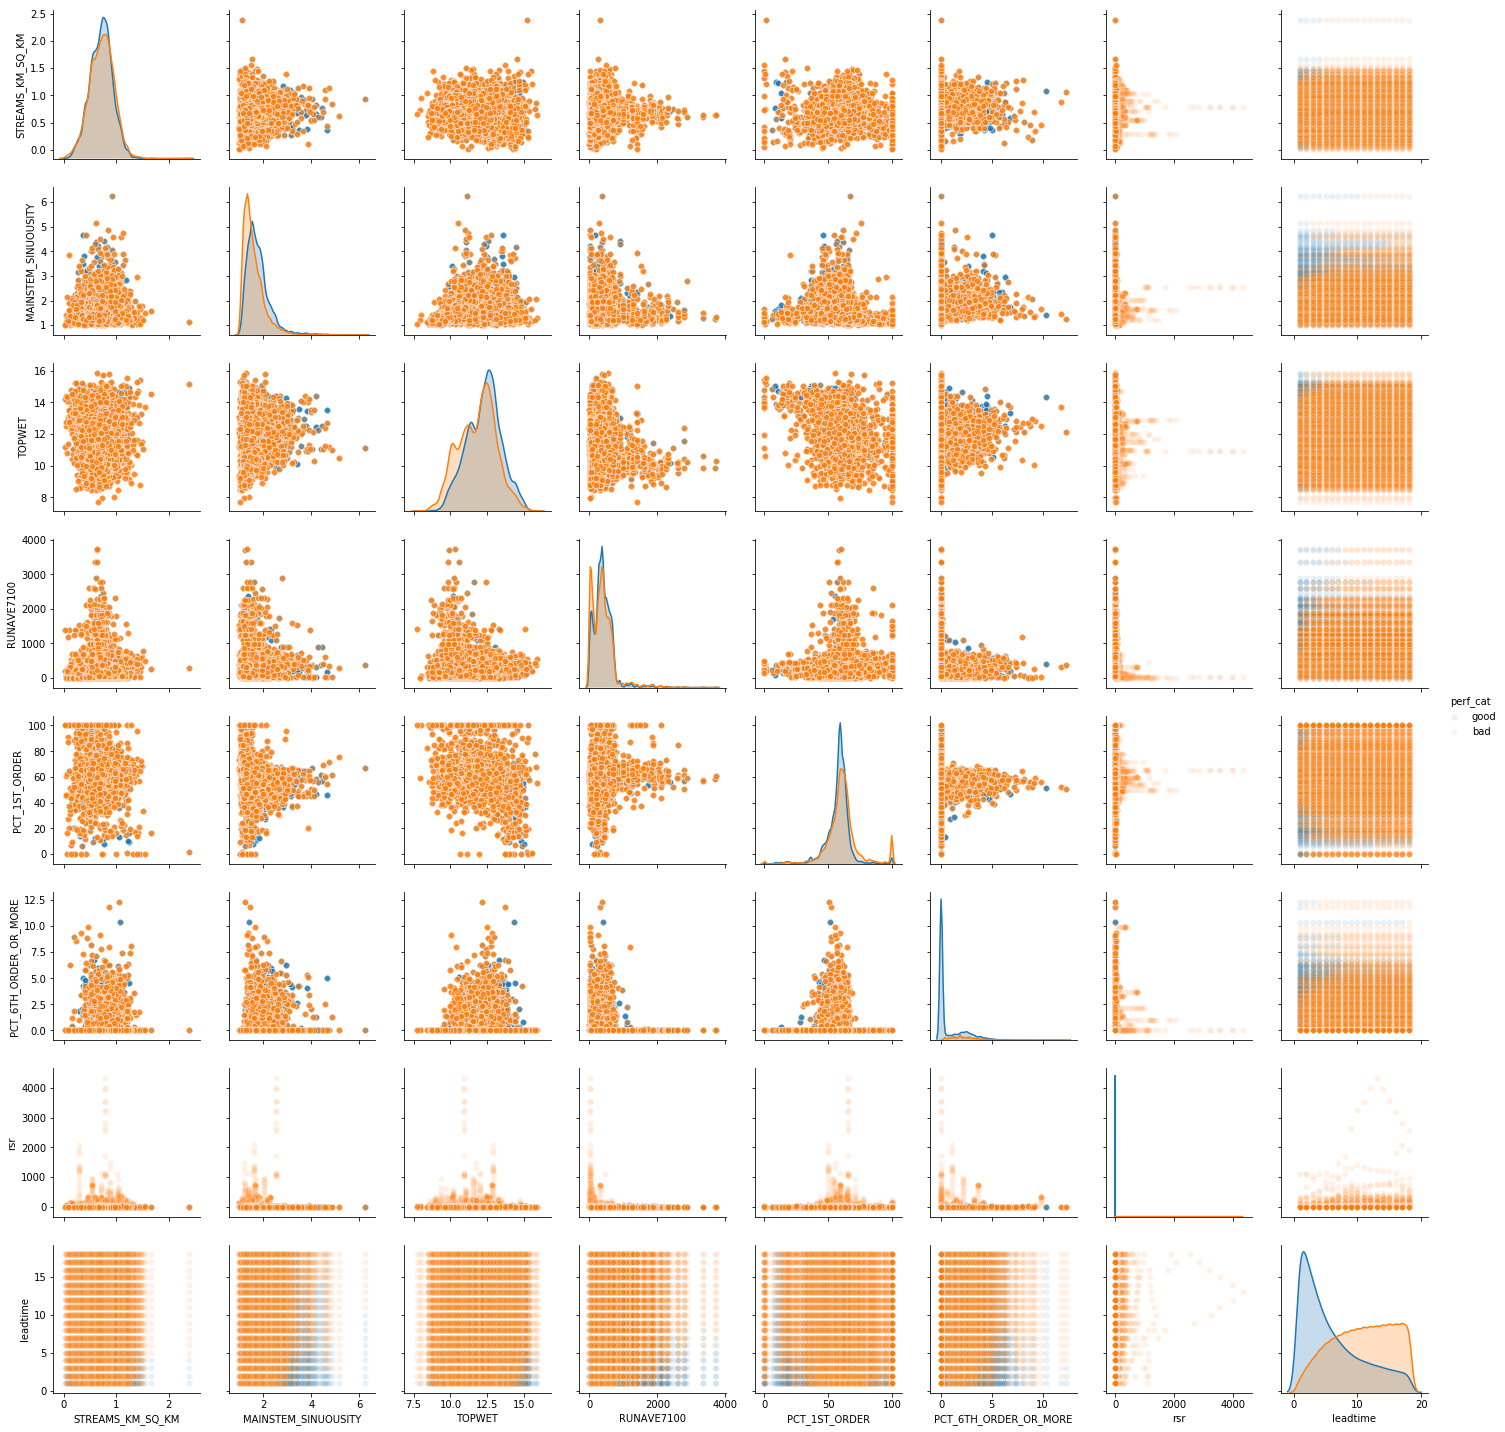

In [16]:
# Pairs plot
sns.pairplot(sub_df[variables],hue='perf_cat',plot_kws=dict(alpha=0.1))

### Hydro modification variables
These variables are related to hydrologic alteration

In [17]:
variables = basin_chars_desc.loc[basin_chars_desc['VARIABLE_TYPE'].isin(['HydroMod_Dams','HydroMod_Other']),
                                'VARIABLE_NAME'].tolist()
variables.append('perf_cat')
variables.append('HYDRO_DISTURB_INDX')
variables.append('rsr')
variables.append('leadtime')
variables = [variable for variable in variables if variable not in drop_features]

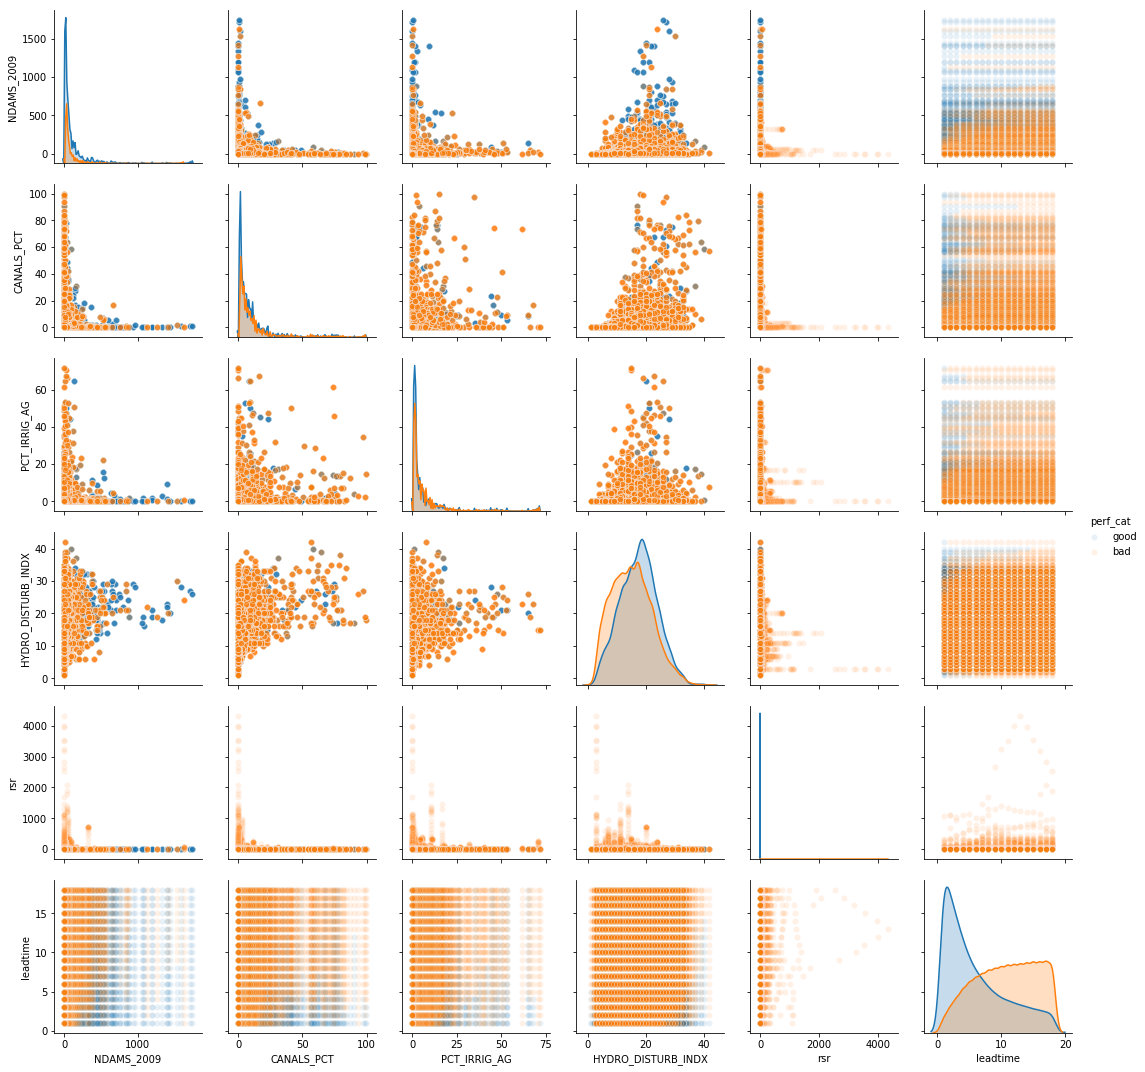

In [18]:
# Pairs plot
sns.pairplot(sub_df[variables],hue='perf_cat',plot_kws=dict(alpha=0.1))

### Morphological variables
These variables describe aspects of basin morphology

In [19]:
variables = basin_chars_desc.loc[basin_chars_desc['VARIABLE_TYPE'].isin(
    ['Bas_Morph','Bound_QA','Landscape_Pat','Topo']),
                                 'VARIABLE_NAME'].tolist()
variables.append('perf_cat')
variables.append('rsr')
variables.append('leadtime')
variables.append('TOPWET')
for feature in ['BAS_COMPACTNESS','SLOPE_PCT']:
    drop_features.append(feature)
variables = [variable for variable in variables if variable not in drop_features]   

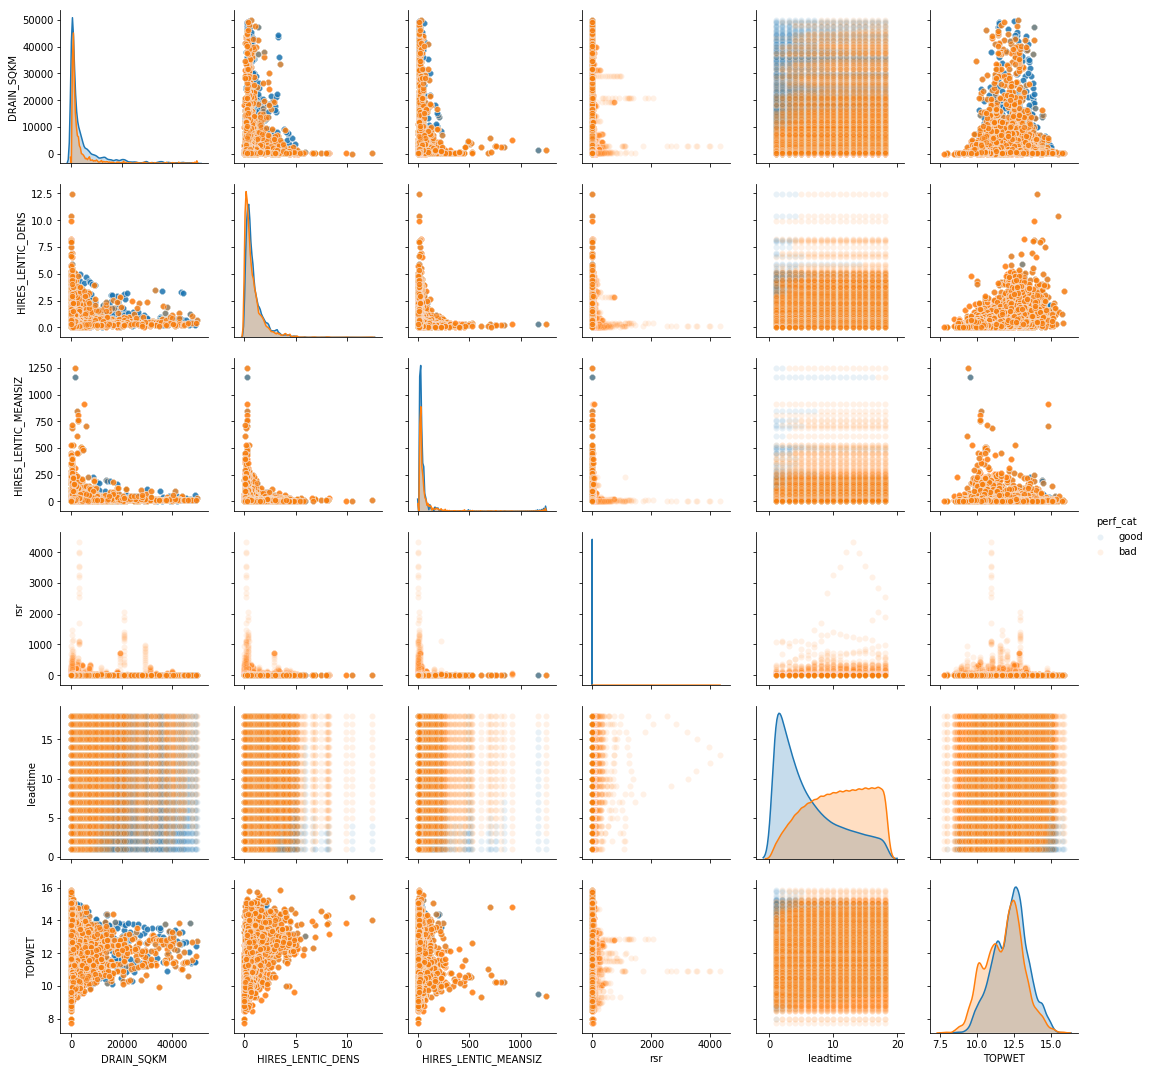

In [20]:
# Pairs plot
sns.pairplot(sub_df[variables],hue='perf_cat',plot_kws=dict(alpha=0.1))

### Climate variables
These variables describe aspects of basin climate

In [21]:
variables = basin_chars_desc.loc[basin_chars_desc['VARIABLE_TYPE'].isin(['Climate']),
                                 'VARIABLE_NAME'].tolist()
variables.append('perf_cat')
variables.append('rsr')
variables.append('leadtime')
for feature in ['WD_SITE','PET']:
    drop_features.append(feature)
variables = [variable for variable in variables if variable not in drop_features]   

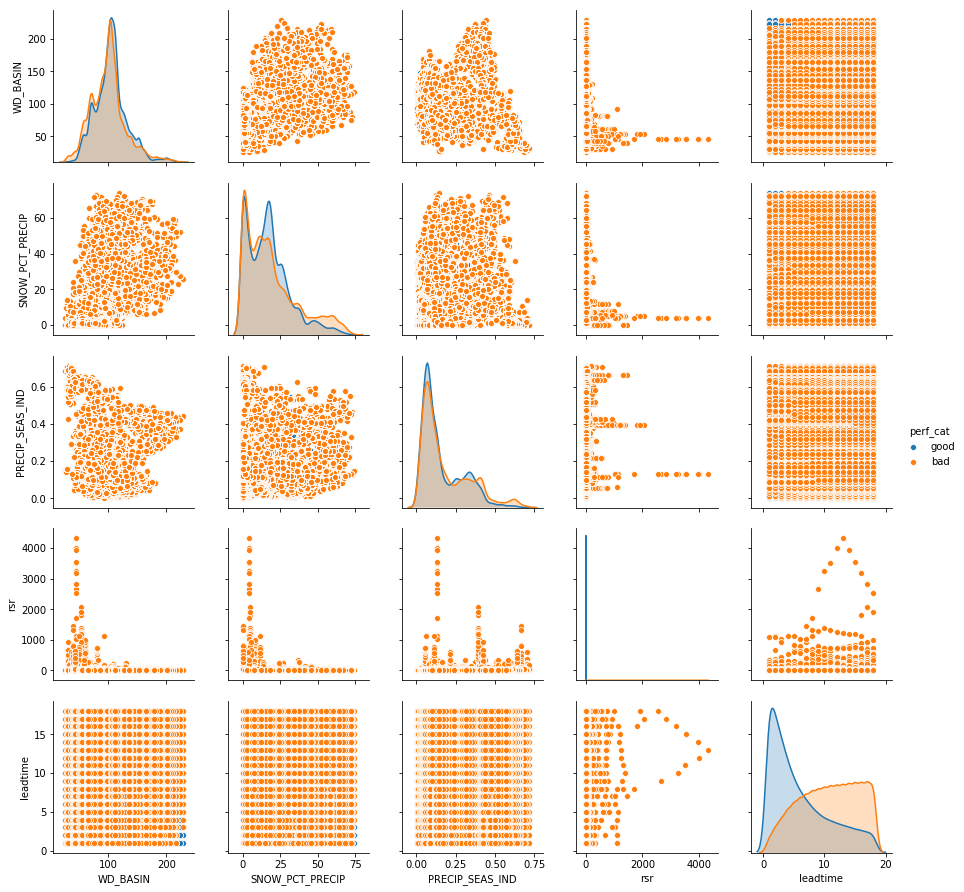

In [22]:
# Pairs plot
sns.pairplot(sub_df[variables],hue='perf_cat')

### Corellations

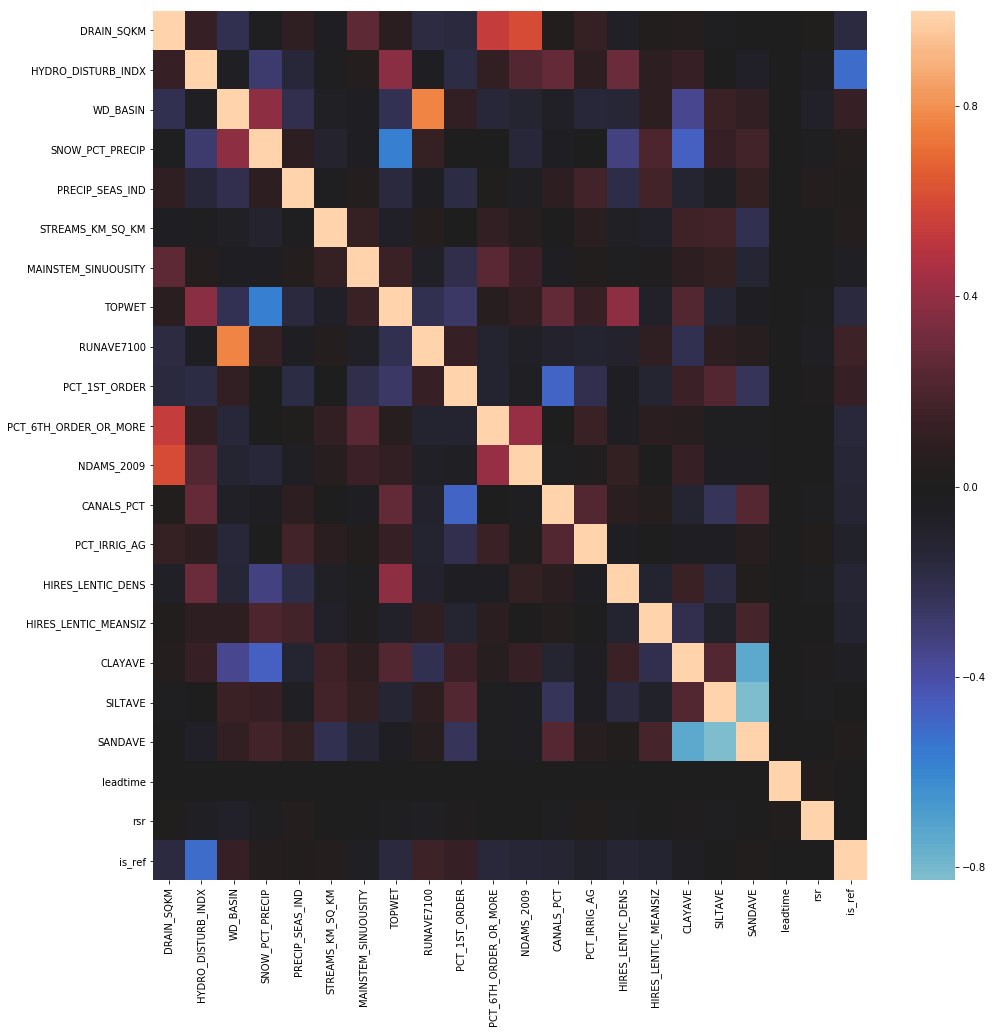

In [23]:
variables = sub_df.columns
variables = [variable for variable in variables if variable not in drop_features] 
plt.figure(figsize=(16, 16))
sns.heatmap(sub_df[variables].corr(),center=0)

# Summary of findings and data export
## Summary
In general, about 30% of samples are classified as 'good' forecasts based off  of an RSR cutof of < 0.7. Generally, these samples have low leadtimes (See density plots on diagonals of pairsplots) as expected due to the influence of data assimilation at low leadtimes. There are very few other clear indicators of model performance based off of basin characteristics. 

In [24]:
drop_features

['RAW_DIS_NEAREST_DAM',
 'RAW_DIS_NEAREST_CANAL',
 'CLASS',
 'mean_obs',
 'std_obs',
 'cv_obs',
 'PCT_2ND_ORDER',
 'PCT_3RD_ORDER',
 'PCT_4TH_ORDER',
 'PCT_5TH_ORDER',
 'PCT_NO_ORDER',
 'BAS_COMPACTNESS',
 'SLOPE_PCT',
 'WD_SITE',
 'PET']

In [25]:
variables = sub_df.columns
variables = [variable for variable in variables if variable not in drop_features] 
sub_df = sub_df[variables]

In [26]:
sub_df.to_parquet('../data/cleaned_df.parquet')